<div class="alert alert-info alert-info"><b><h1>EXERCICI 1</h1></b>
    
Crea almenys dos models de regressió diferents per intentar predir el millor possible el preu de les vivendes (MEDV) de l'arxiu adjunt.
    
</div>

In [99]:
# Importamos las librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import shapiro
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings("ignore")

<div class="alert alert-info alert-info"><b><h1>Fase 1: Recopilación de datos</h1></b>

En un vistazo previo al fichero de datos, podemos ver que los datos no tienen encabezados, por lo que cargamos los datos y asignamos las columnas en el orden que vienen relacionadas en la descripción del dataset.
    
</div>

In [100]:
# Cargamos los datos del archivo en un Dataframe y asignamos nombre a las columnas.

df_housing = pd.read_csv('housing data.csv', header=None)
df_housing.columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']

In [101]:
df_housing.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


<div class="alert alert-info alert-info"><b><h1>Fase 2: Limpieza de datos</h1></b>

Examinamos los datos en busca de errores, valores atípicos o faltantes.
    
</div>

In [102]:
df_housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [103]:
# Vemos los valores únicos de cada uno de los atributos
df_housing.nunique()

CRIM       504
ZN          26
INDUS       76
CHAS         2
NOX         81
RM         446
AGE        356
DIS        412
RAD          9
TAX         66
PTRATIO     46
B          357
LSTAT      455
MEDV       229
dtype: int64

In [104]:
df_housing.shape

(506, 14)

In [105]:
# Comprobamos si hay campos con valor núlo
df_housing.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [106]:
#Comprobamos si hay campos con valor NaN
df_housing.isna().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [107]:
df_housing.describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
CRIM,506.0,3.61,8.60,0.01,0.08,0.26,3.68,88.98
ZN,506.0,11.36,23.32,0.00,0.00,0.00,12.50,100.00
INDUS,506.0,11.14,6.86,0.46,5.19,9.69,18.10,27.74
CHAS,506.0,0.07,0.25,0.00,0.00,0.00,0.00,1.00
NOX,506.0,0.55,0.12,0.38,0.45,0.54,0.62,0.87
RM,506.0,6.28,0.70,3.56,5.89,6.21,6.62,8.78
AGE,506.0,68.57,28.15,2.90,45.02,77.50,94.07,100.00
DIS,506.0,3.80,2.11,1.13,2.10,3.21,5.19,12.13
RAD,506.0,9.55,8.71,1.00,4.00,5.00,24.00,24.00
TAX,506.0,408.24,168.54,187.00,279.00,330.00,666.00,711.00


<div class="alert alert-info alert-info">

De los datos obtenidos con la función nunique() y con describe() podemos ver que tenemos un atributo binario (**CHAS**) y otro atributo que sólo tiene 9 valores (**RAD**), por lo que se pueden considerar atributos categóricos y cambiarles el tipo para que no aparezcan en los cálculos estadísticos.
    
</div>

In [108]:
df_housing[['CHAS']].value_counts()

CHAS
0       471
1        35
dtype: int64

In [109]:
df_housing[['RAD']].value_counts()

RAD
24     132
5      115
4      110
3       38
6       26
2       24
8       24
1       20
7       17
dtype: int64

In [110]:
df_housing[['CHAS', 'RAD']] = df_housing[['CHAS', 'RAD']].astype('category')
df_housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   CRIM     506 non-null    float64 
 1   ZN       506 non-null    float64 
 2   INDUS    506 non-null    float64 
 3   CHAS     506 non-null    category
 4   NOX      506 non-null    float64 
 5   RM       506 non-null    float64 
 6   AGE      506 non-null    float64 
 7   DIS      506 non-null    float64 
 8   RAD      506 non-null    category
 9   TAX      506 non-null    float64 
 10  PTRATIO  506 non-null    float64 
 11  B        506 non-null    float64 
 12  LSTAT    506 non-null    float64 
 13  MEDV     506 non-null    float64 
dtypes: category(2), float64(12)
memory usage: 49.0 KB


<div class="alert alert-info alert-info"><b><h1>Fase 3: Exploración de datos</h1></b>

Realizamos un análisis exploratorio de los datos para comprender su distribución, relaciones y características.   

</div>

<div class="alert alert-info alert-info">


  Información de los campos y descripción de los valores más carácterísticos:

  * **CRIM**: tasa de criminalidad per cápita por ciudad.
  * **ZN**: proporción de terreno residencial zonificado para lotes de más de 25,000 pies cuadrados.
  * **INDUS**: proporción de acres de negocios no minoristas por ciudad.
  * **CHAS**: variable ficticia de Charles River (= 1 si la zona limita con el río; 0 en caso contrario).
  * **NOX**: concentración de óxidos nítricos (partes por 10 millones).
  * **RM**: número promedio de habitaciones por vivienda.
  * **AGE**: proporción de unidades ocupadas por sus propietarios construidas antes de 1940.
  * **DIS**: distancias ponderadas a cinco centros de empleo en Boston.
  * **RAD**: índice de accesibilidad a autopistas radiales.
  * **TAX**: tasa de impuesto a la propiedad de valor total por cada 10,000 dólares.
  * **PTRATIO**: relación alumno-maestro por ciudad.
  * **B**: 1000(Bk - 0.63)^2 donde Bk es la proporción de población afroamericana por ciudad.
  * **LSTAT**: % de estatus socioeconómico bajo de la población.
  * **MEDV**: valor mediano de viviendas ocupadas por sus propietarios en miles de dólares.
  
  Todos los atributos corresponden a variables independientes y podemos afirmar que nuestra variable objetivo es la variable **MEDV**.
    
  </div>

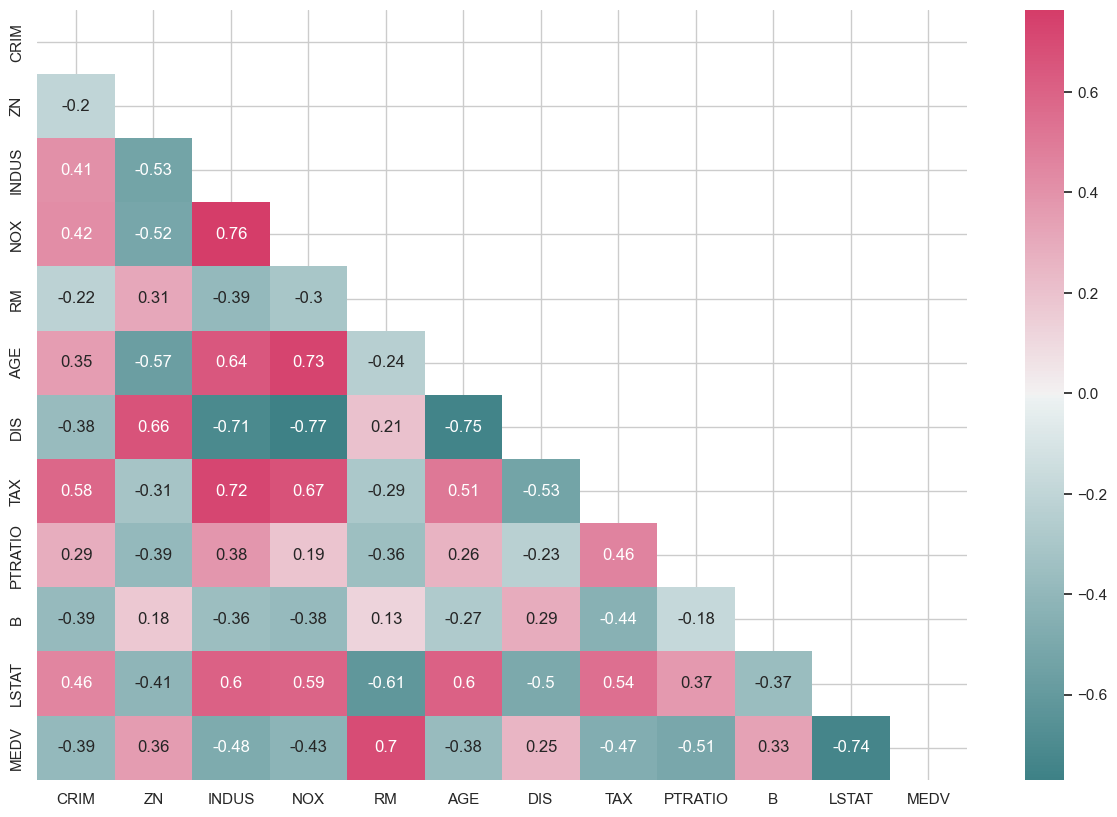

In [111]:
# Comprobamos mediante un heatmap las correlaciones entre las variables
fig, ax = plt.subplots(figsize=(15, 10))
corr = df_housing.corr()
sns.set_theme(style="darkgrid")
cmap = sns.diverging_palette(200, 0, as_cmap=True)
matrix = np.triu(corr)
sns.heatmap(corr, annot=True, mask=matrix, cmap=cmap)
plt.show()

<div class="alert alert-info alert-info">

  Tenemos una correlación positiva fuerte entre las variables **NOX**(concentración de óxidos nítricos-partes por 10 millones-) e **INDUS**(proporción de acres de negocios no minoristas por ciudad) que nos indica que las zonas donde existen negocios no minoristas aparentemente están más contaminadas.
    
  También existe una correlación positiva fuerte entre **MEDV** Y **RM**, lo que nos indica que el número de habitaciones influye al alza en el previo de la vivienda.
    
  Tambien tenemos una correlación positiva entre las variables **AGE**(proporción de unidades ocupadas por sus propietarios construidas antes de 1940) y **NOX** que también parece indicar una relación entre la antigüedad de las viviendas y la contaminación de la zona.
    
  Es de destacar también la corrrelación negativa entre **MEDV** Y **LSTAT**, que nos indica que a mayor porcentaje de población con status socioeconomico bajo, el precio de la vivienda disminuye.
    

    
</div>

<Figure size 800x500 with 0 Axes>

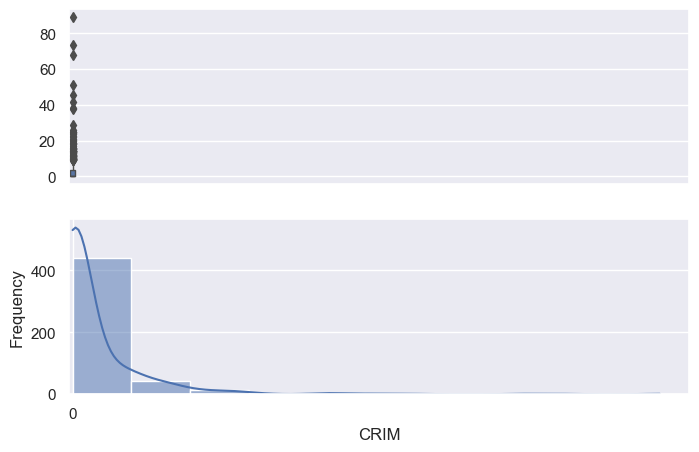

<Figure size 800x500 with 0 Axes>

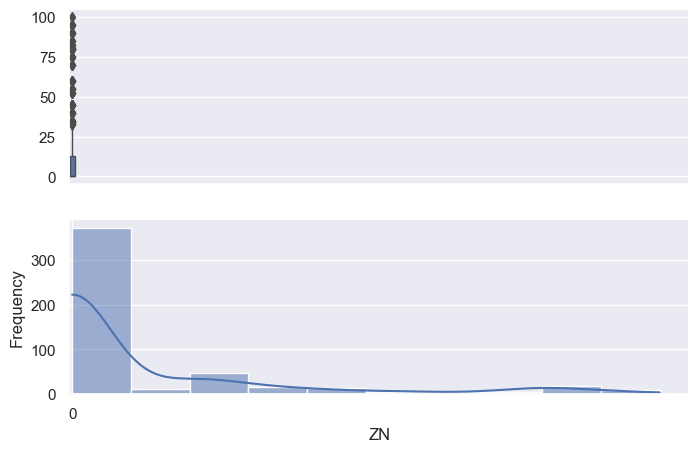

<Figure size 800x500 with 0 Axes>

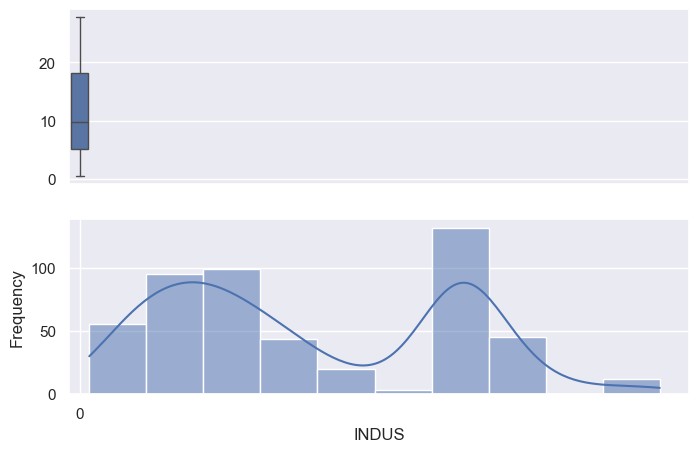

<Figure size 800x500 with 0 Axes>

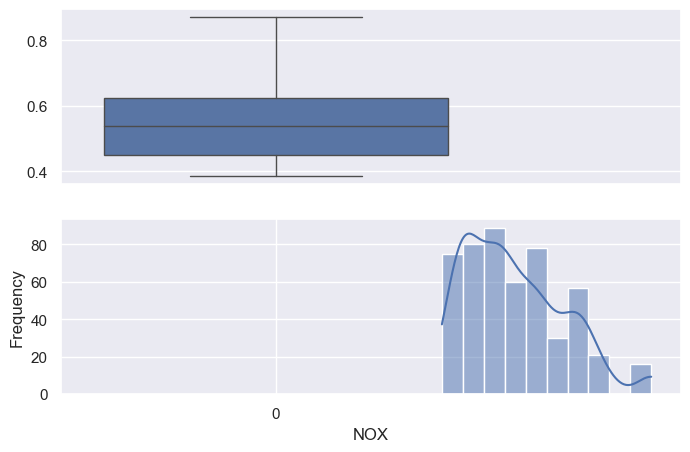

<Figure size 800x500 with 0 Axes>

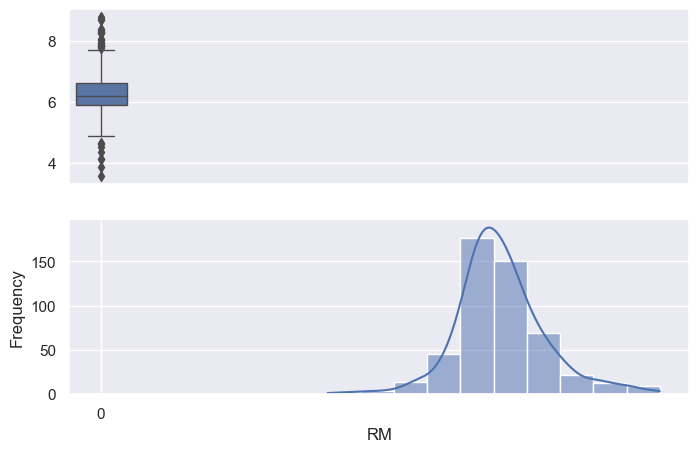

<Figure size 800x500 with 0 Axes>

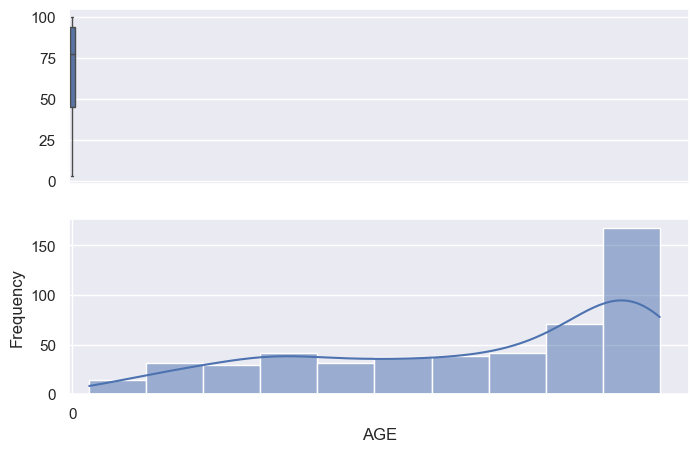

<Figure size 800x500 with 0 Axes>

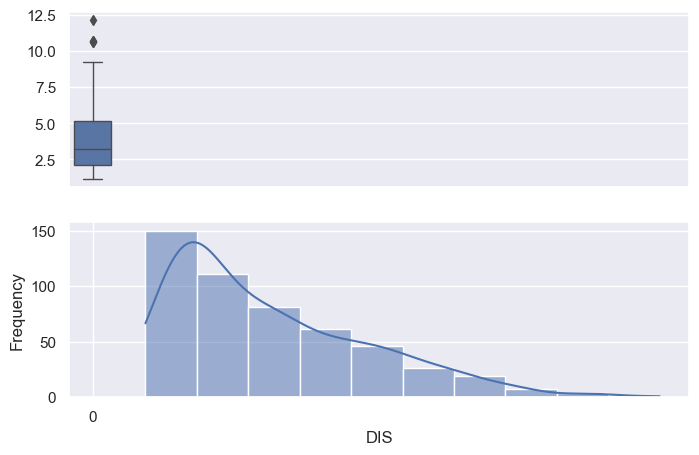

<Figure size 800x500 with 0 Axes>

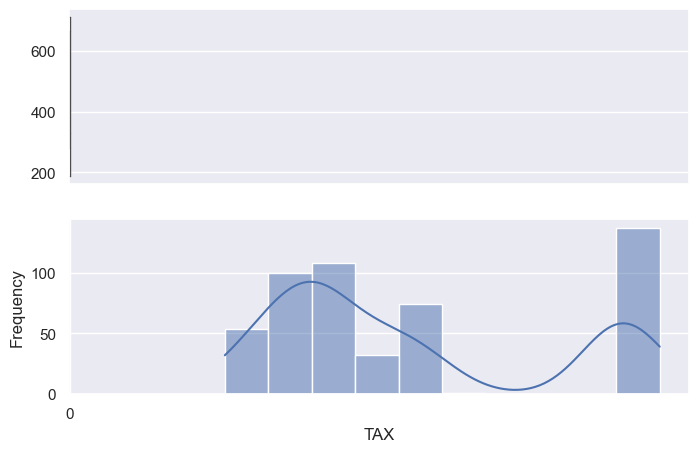

<Figure size 800x500 with 0 Axes>

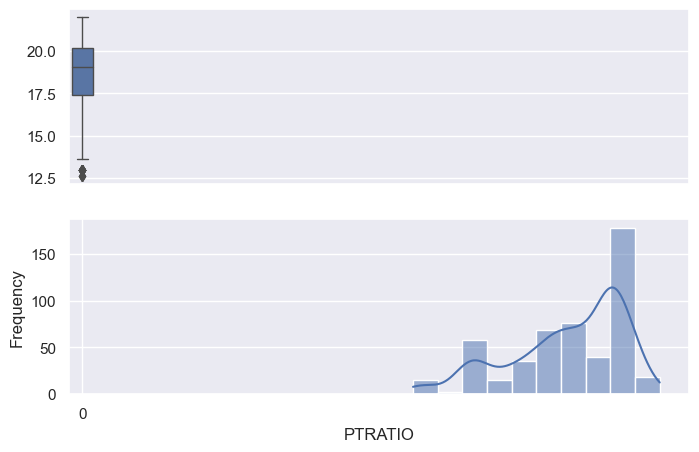

<Figure size 800x500 with 0 Axes>

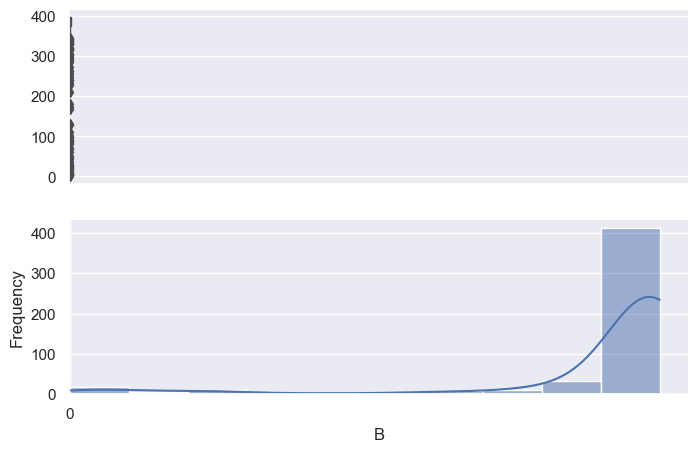

<Figure size 800x500 with 0 Axes>

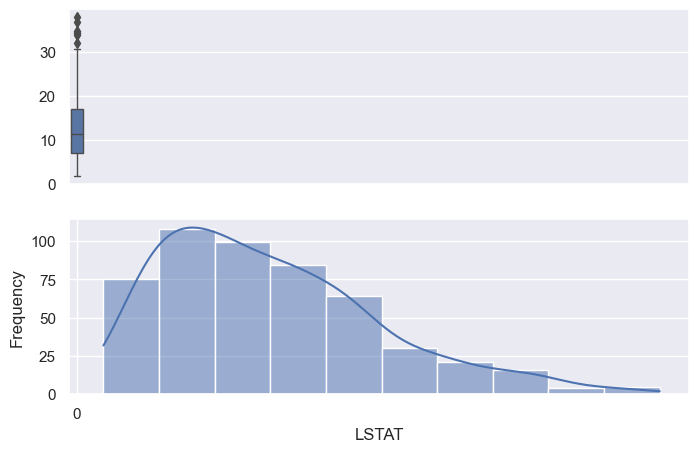

<Figure size 800x500 with 0 Axes>

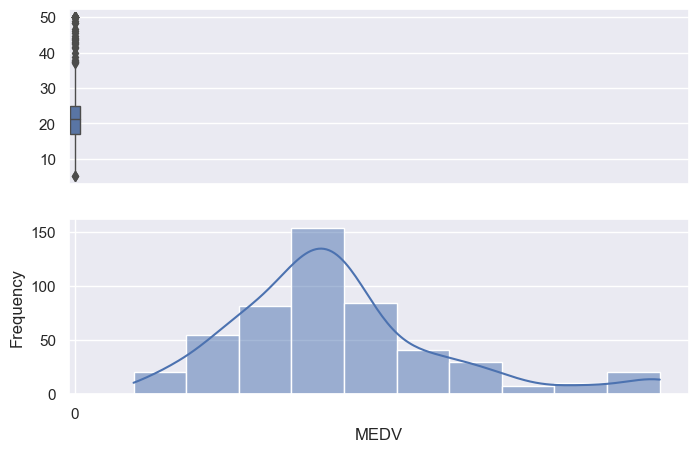

In [112]:
for i in df_housing[['CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'AGE','DIS','TAX','PTRATIO','B','LSTAT','MEDV']]:
    plt.figure()
    plt.tight_layout()
    sns.set(rc={"figure.figsize":(8, 5)})
    f, (ax_box, ax_hist) = plt.subplots(2, sharex=True)
    plt.gca().set(xlabel= i,ylabel='Frequency')
    sns.boxplot(df_housing[i],  ax=ax_box , linewidth= 1.0)
    sns.histplot(df_housing[i], ax=ax_hist , bins = 10,kde=True)

<div class="alert alert-info alert-info">

  Tenemos outliers en alguna de las variables, pero destacan los existentes en la variable **B**. Aparentemente ninguna de las   variables tiene una distribución normal.
    
  Comprobamos mediante shapiro si las variables tienen una distribución gaussiana
    
</div> 

In [113]:
from scipy.stats import shapiro

def distr_normal(df):
    normal = []
    for col in df.select_dtypes(include=['float64']).columns:
        p_valor = shapiro(df[col])[1]
        normal.append(p_valor > 0.05) 
    return normal
resultado = distr_normal(df_housing)
print(resultado)

[False, False, False, False, False, False, False, False, False, False, False, False]


<div class="alert alert-info alert-info"><b><h1>Fase 4: Codificación de variables</h1></b>
    
Convertimos la variables categórica **RAD** en variable numérica, para que pueda ser tratada en los modelos de regresión. Utilizamos para ello **OneHotEncoder**.  
    
</div>

In [114]:
# Creamos la instancia de OneHotEncoder
encoder = OneHotEncoder()

# Ajustar (fit) el encoder a los datos de entrenamiento
encoder.fit(df_housing[['RAD']])

# Transformar los datos de entrenamiento
transformed_train = encoder.transform(df_housing[['RAD']]).toarray()

# Guardamos en un array las etiquetas de las nuevas columnas
feat_lb = ['RAD1', 'RAD2', 'RAD3', 'RAD4', 'RAD5', 'RAD6', 'RAD7', 'RAD8', 'RAD24' ]

# Creamos un nuevo DataFrame
df_housing_trans = pd.DataFrame(transformed_train, columns = feat_lb)

# Podemos eliminar la columna RAD24 ya que al ser valores binários, ya tenemos la información completa con el resto de columnas.
df_housing_trans.drop(['RAD24'],axis=1, inplace= True)

df_housing_trans.head()

,RAD1,RAD2,RAD3,RAD4,RAD5,RAD6,RAD7,RAD8
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [115]:
# Actualizamos las nuevas columnas en el DataFrame original. Previamente eliminamos la columna RAD original.

df_housing.drop(['RAD'],axis=1, inplace= True)

df_housing = pd.concat([df_housing,df_housing_trans], axis=1)

df_housing.head().round(3)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,TAX,PTRATIO,...,LSTAT,MEDV,RAD1,RAD2,RAD3,RAD4,RAD5,RAD6,RAD7,RAD8
0,0.006,18.0,2.31,0,0.538,6.575,65.2,4.090,296.0,15.3,...,4.98,24.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.027,0.0,7.07,0,0.469,6.421,78.9,4.967,242.0,17.8,...,9.14,21.6,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.027,0.0,7.07,0,0.469,7.185,61.1,4.967,242.0,17.8,...,4.03,34.7,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.032,0.0,2.18,0,0.458,6.998,45.8,6.062,222.0,18.7,...,2.94,33.4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.069,0.0,2.18,0,0.458,7.147,54.2,6.062,222.0,18.7,...,5.33,36.2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


<div class="alert alert-info alert-info"><b><h1>Fase 5: Escalado de características</h1></b>
    
Escalamos el resto de las variables según sus carácterísticas. Al no tener ninguna de las variables distribución normal, optamos por aplicar **RobustScaler** y **MinMaxScaler** dependiendo de si existen o no outliers en la misma.  
    
</div>

<div class="alert alert-info alert-info">
    
Ahora elegimos las variables que tienen outliers y aplicamos una estandarización con **RobustScaler**. 
    
</div>

In [116]:
# Crear una instancia de RobustScaler
scaler = RobustScaler()

# Creamos la variable que contenga las etiquetas de las columnas (no normalizamos la variable objetivo MEDV)
feat_lb = ['CRIM', 'ZN','RM', 'DIS', 'PTRATIO', 'B', 'LSTAT']

# Ajustar (fit) el scaler a los datos de entrenamiento
scaler.fit(df_housing[feat_lb])

# Transformar los datos de entrenamiento
transformed_train = scaler.transform(df_housing[feat_lb])


# Creamos un nuevo DataFrame
df_housing_trans = pd.DataFrame(transformed_train, columns=feat_lb)

df_housing_trans.head().round(3)

,CRIM,ZN,RM,DIS,PTRATIO,B,LSTAT
0,-0.070,1.44,0.497,0.286,-1.339,0.262,-0.638
1,-0.064,0.00,0.288,0.570,-0.446,0.262,-0.222
2,-0.064,0.00,1.323,0.570,-0.446,0.067,-0.733
3,-0.062,0.00,1.070,0.924,-0.125,0.153,-0.842
4,-0.052,0.00,1.272,0.924,-0.125,0.262,-0.603


In [117]:
# Actualizamos las nuevas columnas en el DataFrame original.

df_housing.update(df_housing_trans)

df_housing.head().round(3)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,TAX,PTRATIO,...,LSTAT,MEDV,RAD1,RAD2,RAD3,RAD4,RAD5,RAD6,RAD7,RAD8
0,-0.070,1.44,2.31,0,0.538,0.497,65.2,0.286,296.0,-1.339,...,-0.638,24.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-0.064,0.00,7.07,0,0.469,0.288,78.9,0.570,242.0,-0.446,...,-0.222,21.6,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-0.064,0.00,7.07,0,0.469,1.323,61.1,0.570,242.0,-0.446,...,-0.733,34.7,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-0.062,0.00,2.18,0,0.458,1.070,45.8,0.924,222.0,-0.125,...,-0.842,33.4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,-0.052,0.00,2.18,0,0.458,1.272,54.2,0.924,222.0,-0.125,...,-0.603,36.2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


<div class="alert alert-info alert-info">
    
Aplicamos un escalado al resto de variables utilizando **MinMaxScaler**. 
    
</div>

In [118]:
# Crear una instancia de MinMaxScaler
scaler = MinMaxScaler()

# Creamos la variable que contenga las etiquetas de las columnas
feat_lb = ['INDUS', 'NOX', 'AGE', 'TAX']

# Ajustar (fit) el scaler a los datos de entrenamiento
scaler.fit(df_housing[feat_lb])

# Transformar los datos de entrenamiento
transformed_train = scaler.transform(df_housing[feat_lb])


# Creamos un nuevo DataFrame
df_housing_trans = pd.DataFrame(transformed_train, columns=feat_lb)

df_housing_trans.head().round(3)

,INDUS,NOX,AGE,TAX
0,0.068,0.315,0.642,0.208
1,0.242,0.173,0.783,0.105
2,0.242,0.173,0.599,0.105
3,0.063,0.150,0.442,0.067
4,0.063,0.150,0.528,0.067


In [119]:
# Actualizamos las nuevas columnas en el DataFrame original.

df_housing.update(df_housing_trans)

df_housing.head().round(3)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,TAX,PTRATIO,...,LSTAT,MEDV,RAD1,RAD2,RAD3,RAD4,RAD5,RAD6,RAD7,RAD8
0,-0.070,1.44,0.068,0,0.315,0.497,0.642,0.286,0.208,-1.339,...,-0.638,24.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-0.064,0.00,0.242,0,0.173,0.288,0.783,0.570,0.105,-0.446,...,-0.222,21.6,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-0.064,0.00,0.242,0,0.173,1.323,0.599,0.570,0.105,-0.446,...,-0.733,34.7,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-0.062,0.00,0.063,0,0.150,1.070,0.442,0.924,0.067,-0.125,...,-0.842,33.4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,-0.052,0.00,0.063,0,0.150,1.272,0.528,0.924,0.067,-0.125,...,-0.603,36.2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


<div class="alert alert-info alert-info"><b><h1>Fase 6: Dividimos los datos en Train y Test</h1></b>
    
    
</div>

In [120]:
X = df_housing.drop(['MEDV'],axis=1)
y = df_housing['MEDV']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(len(X_train))
print(len(y_test))

404
102


<div class="alert alert-info alert-info"><b><h1>Aplicamos los modelos</h1></b>
    
    
</div>

<div class="alert alert-info alert-info"><b><h1>LinearRegression</h1></b>
    
    
</div>

In [121]:
# Creamos el modelo y lo entrenamoscon con los datos de entrenamiento.
l_reg = LinearRegression().fit(X_train, y_train)

In [122]:
# Obtenemos los datos de predicción basandonos en el X_test
y_pre_l_reg = l_reg.predict(X_test)
y_pre_l_reg[0:10]

array([28.95938976, 35.34238717, 16.4501836 , 24.56335068, 18.69676207,
       23.80091425, 17.09701118, 14.68163026, 23.03343738, 18.59883455])

Text(0, 0.5, 'Predicción')

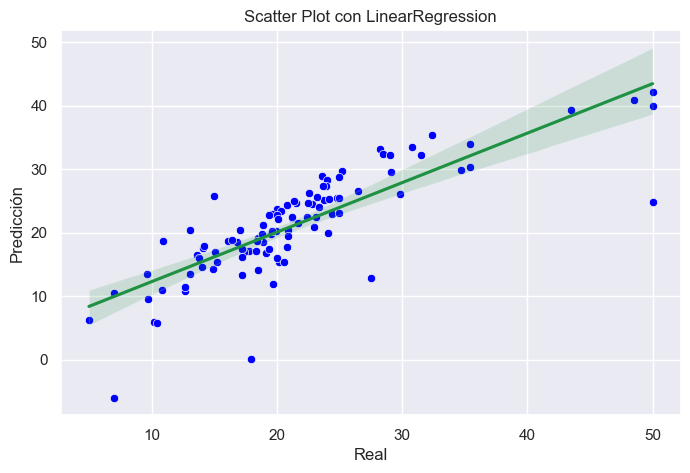

In [123]:
#Reflejamos en un gráfico lo valores de la predicción y los comparamos con los valores reales y_test
resultados = pd.DataFrame({'Real': y_test, 'Predicción': y_pre_l_reg})

scatterplot = sns.scatterplot(x="Real", y="Predicción", data=resultados, color='blue')

# Agregar la línea de regresión
regplot = sns.regplot(x="Real", y="Predicción", data=resultados, scatter=False, color='#1e9143')

# Personalizar el gráfico
scatterplot.set_title("Scatter Plot con LinearRegression")
scatterplot.set_xlabel("Real")
scatterplot.set_ylabel("Predicción")

<div class="alert alert-info alert-info"><b><h1>RandomForestRegression</h1></b>
    
    
</div>

In [124]:
# Creamos el modelo y lo entrenamoscon con los datos de entrenamiento.
r_for = RandomForestRegressor().fit(X_train, y_train)

In [125]:
# Obtenemos los datos de predicción basandonos en el X_test
y_pre_r_for = r_for.predict(X_test)
y_pre_r_for[0:10]

array([22.868, 30.75 , 16.955, 23.6  , 16.851, 21.156, 18.669, 15.662,
       21.308, 20.91 ])

Text(0, 0.5, 'Predicción')

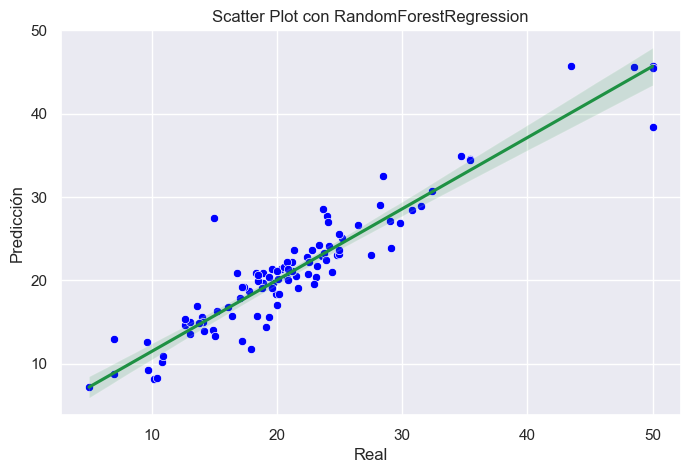

In [126]:
#Reflejamos en un gráfico lo valores de la predicción y los comparamos con los valores reales y_test
resultados = pd.DataFrame({'Real': y_test, 'Predicción': y_pre_r_for})

scatterplot = sns.scatterplot(x="Real", y="Predicción", data=resultados, color='blue')

# Agregar la línea de regresión
regplot = sns.regplot(x="Real", y="Predicción", data=resultados, scatter=False, color='#1e9143')

# Personalizar el gráfico
scatterplot.set_title("Scatter Plot con RandomForestRegression")
scatterplot.set_xlabel("Real")
scatterplot.set_ylabel("Predicción")

<div class="alert alert-info alert-info"><b><h1>DecisionTreeRegression</h1></b>
    
    
</div>

In [127]:
# Creamos el modelo y lo entrenamoscon los datos obtenidos

d_tree = DecisionTreeRegressor(random_state=42).fit(X_train, y_train)

In [128]:
# Obtenemos los datos de predicción basandonos en el X_test

y_pre_d_tree = d_tree.predict(X_test)
y_pre_d_tree[0:10]

array([25. , 33.1, 15.2, 21.7, 23.2, 18.5, 16.7, 16.7, 22.7, 22. ])

Text(0, 0.5, 'Predicción')

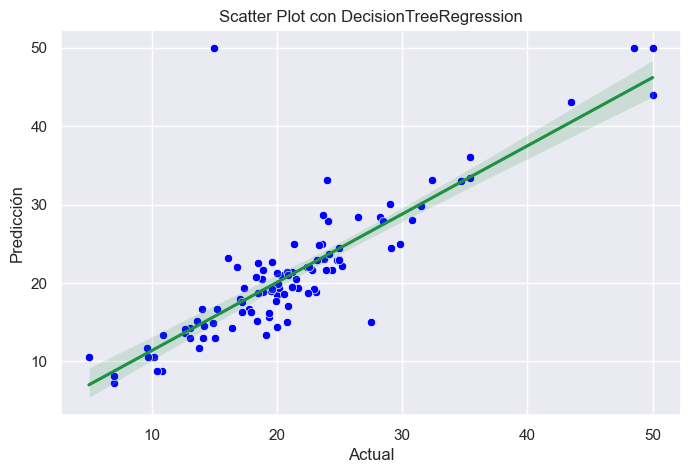

In [129]:
resultados = pd.DataFrame({'Real': y_test, 'Predicción': y_pre_d_tree})

scatterplot = sns.scatterplot(x="Real", y="Predicción", data=resultados, color='blue')

# Agregar la línea de regresión
regplot = sns.regplot(x="Real", y="Predicción", data=resultados, scatter=False, color='#1e9143')

# Personalizar el gráfico
scatterplot.set_title("Scatter Plot con DecisionTreeRegression")
scatterplot.set_xlabel("Actual")
scatterplot.set_ylabel("Predicción")

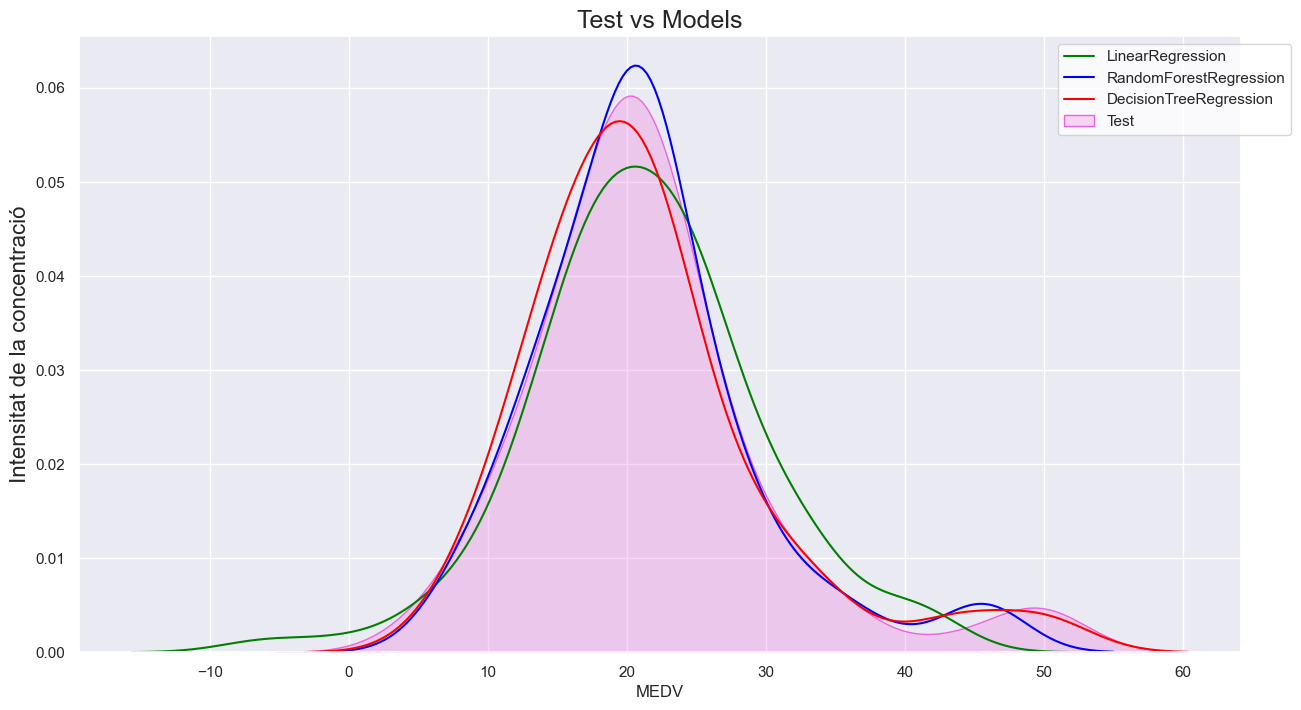

In [130]:
fig, ax = plt.subplots(figsize=(15,8))
sns.set(style= "whitegrid")

sns.kdeplot(y_pre_l_reg , label='LinearRegression', color='green', fill=False)
sns.kdeplot(y_pre_r_for, label='RandomForestRegression', color='blue', fill=False)
sns.kdeplot(y_pre_d_tree, label='DecisionTreeRegression', color='red', fill=False)
sns.kdeplot(y_test, label='Test', color='#EF62DE', fill=True)
plt.title("Test vs Models", fontsize = 18)
plt.ylabel('Intensitat de la concentració', fontsize = 16)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper right')
plt.show()

<div class="alert alert-info alert-info">
 
Por lo que podemos ver de forma gráfica, parece que el **RandomForestRegression** es el que mejor ajusta a la distribucióon de los datos reales del _y_test_, aunque en la realización del ejercicio 2 lo podemos comprobar mejor de manéra numérica.
    
</div>

<div class="alert alert-info alert-info"><b><h1>EXERCICI 2</h1></b>
    
Compara’ls en base al MSE i al R2.
    
</div>

In [131]:
# Cargamos la medida R2 para evaluar los modelos de regresión realizados.
r2_l_reg = r2_score(y_test,y_pre_l_reg)
r2_r_for = r2_score(y_test, y_pre_r_for)
r2_d_tree = r2_score(y_test, y_pre_d_tree)

In [132]:
# Cargamos la medida MSE para evaluar los modelos de regresión realizados.
mse_l_reg = mean_squared_error(y_test,y_pre_l_reg)
mse_r_for = mean_squared_error(y_test, y_pre_r_for)
mse_d_tree = mean_squared_error(y_test, y_pre_d_tree)

In [133]:
# Creamos un DataFrame para poder comparar los resultados de ambas medidas.
resultados = pd.DataFrame( data = [['LinearRegression', r2_l_reg, mse_l_reg],
                                  ['RandomForestRegression', r2_r_for, mse_r_for],
                                  ['DecisionTreeRegression', r2_d_tree, mse_d_tree]],
                                  columns = ['Model', 'R2', 'MSE'])
resultados.head().round(3)

,Model,R2,MSE
0,LinearRegression,0.662,24.818
1,RandomForestRegression,0.889,8.165
2,DecisionTreeRegression,0.715,20.880


<div class="alert alert-info alert-info">
 
   Cómo ya habíamos podido comprobar de manera gráfica, es el modelo **RandomForestRegression** el que presenta mejores valores en la comparación de los 3 modelos utilizados. Presenta el valor R2 más alto, lo que quiere decir que el prácticamente explica la varianza de los datos y se ajusta mucho a la línea base.
    También en la medida del MSE presenta el valor más bajo, lo que quiere decir que la diferencia entre los valores predichos y los reales es muy pequeña.
    
</div>

<div class="alert alert-info alert-info"><b><h1>EXERCICI 3</h1></b>
    
Entrena’ls utilitzant els diferents paràmetres que admeten per intentar millorar-ne la predicció.
    
</div>

<div class="alert alert-info alert-info">
    
Utilizaremos GridSearchCV, que es un técnica que nos permite evaluar de forma exhaustiva la mejor combinación de parámetros para un modelo.
    
</div>

In [134]:
# Obtenemos los parámetros por defecto del modelo LinearRegression
l_reg.get_params()

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False}

In [135]:
# Creamos un diccionario con los valores de los parámetros que nos interesan evaluar.
l_reg_param = {'fit_intercept':(True, False),
           'n_jobs':(-1, None, 1),
           'positive':(True, False)}
#creamos una instancia de GridSearchCV y la llamamos con los valores para evaluar nuestro modelo LinearRegression
l_reg_grid = GridSearchCV(l_reg, l_reg_param)

In [136]:
# Obtenemos los mejores parámetros entrenando la instancia con los datos de entrenamiento.
l_reg_grid_best= l_reg_grid.fit(X_train, y_train)
print("Los mejores parámetros para el LinearRegression son: \n", l_reg_grid.best_params_)

Los mejores parámetros para el LinearRegression son: 
 {'fit_intercept': True, 'n_jobs': -1, 'positive': False}


In [137]:
# Aplicamos los valores obtenidos al modelo LinearRegression modificando los valores anteriores que no son los valores por defecto.
l_reg_best = LinearRegression(n_jobs=-1).fit(X_train, y_train)
y_pre_l_reg_best = l_reg_best.predict(X_test)
y_pre_l_reg_best[0:10]

array([28.95938976, 35.34238717, 16.4501836 , 24.56335068, 18.69676207,
       23.80091425, 17.09701118, 14.68163026, 23.03343738, 18.59883455])

In [138]:
# Obtetenmos los valores de las medidas MSE y R2
mse_l_reg_best = mean_squared_error(y_test, y_pre_l_reg_best)
r2_l_reg_best = r2_score(y_test, y_pre_l_reg_best)

In [139]:
# Obtenemos los parámetros por defecto del modelo RandomForestRegression
r_for.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [140]:
# Creamos un diccionario con los valores de los parámetros que nos interesan evaluar.
r_for_param = {'n_estimators': [50, 100, 150],
    'max_depth': [None,5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']}
#creamos una instancia de GridSearchCV y la llamamos con los valores para evaluar nuestro modelo RandomForest
r_for_grid = GridSearchCV(r_for, r_for_param)

In [141]:
# Obtenemos los mejores parámetros entrenando la instancia con los datos de entrenamiento (tarda varios minutos).
r_for_grid_best= r_for_grid.fit(X_train, y_train)
print("Los mejores parámetros para el RandomForestRegression son: \n", r_for_grid_best.best_params_)

Los mejores parámetros para el RandomForestRegression son: 
 {'max_depth': None, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 150}


In [142]:
# Aplicamos los valores obtenidos al modelo RandomForestRegression modificando los valores anteriores que no son los valores por defecto.
r_for_best = RandomForestRegressor(max_features='log2', n_estimators = 150).fit(X_train, y_train)
y_pre_r_for_best = r_for_best.predict(X_test)
y_pre_r_for_best[0:10]

array([24.49      , 31.962     , 15.64      , 23.58066667, 16.918     ,
       21.32533333, 19.406     , 15.43466667, 21.04533333, 20.15466667])

In [143]:
# Obtenemos los valores de las medidas MSE y R2
mse_r_for_best = mean_squared_error(y_test, y_pre_r_for_best)
r2_r_for_best = r2_score(y_test, y_pre_r_for_best)

In [144]:
# Obtenemos los parámetros por defecto del modelo DecisionTreeRegression
d_tree.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 42,
 'splitter': 'best'}

In [145]:
# Creamos un diccionario con los valores de los parámetros que nos interesan evaluar.
d_tree_param = {'max_depth': [None,5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']}
#creamos una instancia de GridSearchCV y la llamamos con los valores para evaluar nuestro modelo DecisionTree
d_tree_grid = GridSearchCV(d_tree,d_tree_param)

In [146]:
# Obtenemos los mejores parámetros entrenando la instancia con los datos de entrenamiento.
d_tree_grid_best= d_tree_grid.fit(X_train, y_train)
print("Los mejores parámetros para el DecisionTreeRegression son: \n", d_tree_grid_best.best_params_)

Los mejores parámetros para el DecisionTreeRegression son: 
 {'max_depth': None, 'max_features': 'auto', 'min_samples_leaf': 2, 'min_samples_split': 10}


In [147]:
# Aplicamos los valores obtenidos al modelo DecisionTreeRegression modificando los valores anteriores que no son los valores por defecto.
d_tree_best = DecisionTreeRegressor(max_features='auto', min_samples_leaf = 2,min_samples_split = 10 ).fit(X_train, y_train)
y_pre_d_tree_best = d_tree_best.predict(X_test)
y_pre_d_tree_best[0:10]

array([25.55      , 33.175     , 19.73333333, 20.75      , 20.76666667,
       19.3       , 18.2       , 18.2       , 22.22      , 20.93333333])

In [148]:
# Obtenemos los valores de las medidas MSE y R2
mse_d_tree_best = mean_squared_error(y_test, y_pre_d_tree_best)
r2_d_tree_best = r2_score(y_test, y_pre_d_tree_best)

In [149]:
# Creamos un nuevo DataFrame donde comparar los valores de los modelos antes y despúes de la mejora.
resultados = pd.DataFrame( data = [['LinearRegression', r2_l_reg, mse_l_reg,r2_l_reg_best,mse_l_reg_best],
                                  ['RandomForestRegression', r2_r_for, mse_r_for,r2_r_for_best,mse_r_for_best],
                                  ['DecisionTreeRegression', r2_d_tree, mse_d_tree,r2_d_tree_best,mse_d_tree_best]],
                                  columns = ['Model', 'R2', 'MSE','R2_best','MSE_best'])
resultados.head().round(3)

,Model,R2,MSE,R2_best,MSE_best
0,LinearRegression,0.662,24.818,0.662,24.818
1,RandomForestRegression,0.889,8.165,0.852,10.864
2,DecisionTreeRegression,0.715,20.880,0.860,10.264


<div class="alert alert-info alert-info">
    
Podemos ver que los valores para el modelo LinearRegression son iguales, empeoran ligeramente para el modelo RandomForest y mejoran el modelo DecisionTree, aunque sigue teniendo valores peores comparado al modelo RandomForest con los parámetros por defecto.
    
</div>

<div class="alert alert-info alert-info"><b><h1>EXERCICI 4</h1></b>
    
Compara el seu rendiment emprant l’aproximació traint/test o emprant totes les dades (validació interna).
    
</div>

<div class="alert alert-info alert-info">
    
Para elo utilizaremos la validación cruzada (cross_val_score), que es una función que nos permite ver la métrica de un modelo en diferentes divisiones de los datos. En nuestro caso al ser un problema de regresión, utilizaremos cmo _scoring_ los valores **neg_mean_squared_error** y **r2** para comparar los resultados. 

Lo aplicaremos a los modelos mejorados.
    
</div>

In [150]:
#creamos las instancias de cross_val_score para scoring='r2'
cr_l_reg_best_r2 = cross_val_score(l_reg_best, X, y, cv=5, scoring='r2')
cr_r_for_best_r2 = cross_val_score(r_for_best, X, y, cv=5, scoring='r2')
cr_d_tree_best_r2 = cross_val_score(d_tree_best, X, y, cv=5, scoring='r2')

In [151]:
# Añadimos las medias de los valores obtenidos a nuestro DataFrame Resultados
resultados['r2_CrVal'] = [cr_l_reg_best_r2.mean(), cr_r_for_best_r2.mean(), cr_d_tree_best_r2.mean()]
resultados.head().round(3)

,Model,R2,MSE,R2_best,MSE_best,r2_CrVal
0,LinearRegression,0.662,24.818,0.662,24.818,0.325
1,RandomForestRegression,0.889,8.165,0.852,10.864,0.615
2,DecisionTreeRegression,0.715,20.880,0.860,10.264,0.176


In [152]:
#creamos las instancias de cross_val_score para scoring='neg_mean_squared_error'
cr_l_reg_best_mse = cross_val_score(l_reg_best, X, y, cv=5, scoring='neg_mean_squared_error')
cr_r_for_best_mse = cross_val_score(r_for_best, X, y, cv=5, scoring='neg_mean_squared_error')
cr_d_tree_best_mse = cross_val_score(d_tree_best, X, y, cv=5, scoring='neg_mean_squared_error')

In [153]:
# Añadimos las medias de los valores obtenidos a nuestro DataFrame Resultados
resultados['mse_CrVal'] = [cr_l_reg_best_mse.mean(), cr_r_for_best_mse.mean(), cr_d_tree_best_mse.mean()]
resultados.head().round(3)

,Model,R2,MSE,R2_best,MSE_best,r2_CrVal,mse_CrVal
0,LinearRegression,0.662,24.818,0.662,24.818,0.325,-37.889
1,RandomForestRegression,0.889,8.165,0.852,10.864,0.615,-23.092
2,DecisionTreeRegression,0.715,20.880,0.860,10.264,0.176,-36.151


<div class="alert alert-info alert-info">
    
Los valores obtenidos en la funcion de validación cruzada nos reafirman que el mejor modelo sigue siendo el Random Forest, ya que para R2 obtiene el valor de media más alto y para el mse también obtiene el valor más alto ( o valor absoluto del negativo más bajo).
</div>

<div class="alert alert-info alert-info"><b><h1>EXERCICI 5</h1></b>
    
No facis servir la variable del nombre d'habitacions (RM) a l’hora de fer prediccions.
    
</div>

<div class="alert alert-info alert-info">

Repetimos todos los pasos realizados entre el ejercicio 1 y el 4, pero antes sacaremos la columna "RM" de los datos.
    
</div>

In [154]:
X = df_housing.drop(['RM','MEDV'],axis=1)
y = df_housing['MEDV']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(len(X_train))
print(len(y_test))

404
102


In [155]:
X_train.head().round(3)

,CRIM,ZN,INDUS,CHAS,NOX,AGE,DIS,TAX,PTRATIO,B,LSTAT,RAD1,RAD2,RAD3,RAD4,RAD5,RAD6,RAD7,RAD8
477,4.108,0.0,0.647,0,0.471,0.972,-0.358,0.914,0.411,-2.013,1.354,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
15,0.103,0.0,0.282,0,0.315,0.552,0.418,0.229,0.696,0.201,-0.289,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
332,-0.062,2.8,0.205,0,0.109,0.210,1.112,0.223,-0.768,-1.400,-0.353,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
423,1.890,0.0,0.647,0,0.471,0.847,-0.384,0.914,0.411,-18.655,1.192,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
19,0.131,0.0,0.282,0,0.315,0.686,0.191,0.229,0.696,-0.024,-0.008,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [156]:
# LinearRegression
l_regnoRM = LinearRegression().fit(X_train, y_train)
y_pre_l_regnoRM = l_regnoRM.predict(X_test)
y_pre_l_regnoRM[0:10]

array([30.38073759, 35.92681039, 14.34744007, 24.8552756 , 17.68110606,
       23.12917085, 16.86669304, 10.62727179, 23.56715594, 18.473865  ])

In [157]:
# RandomForestRegression
r_fornoRM = RandomForestRegressor().fit(X_train, y_train)
y_pre_r_fornoRM = r_fornoRM.predict(X_test)
y_pre_r_fornoRM[0:10]

array([24.196, 36.143, 16.653, 25.244, 16.55 , 21.054, 19.062, 15.014,
       21.074, 20.638])

In [158]:
# DecisionTreeRegression
d_treenoRM = DecisionTreeRegressor(random_state=42).fit(X_train, y_train)
y_pre_d_treenoRM = d_treenoRM.predict(X_test)
y_pre_d_treenoRM[0:10]

array([22.2, 32. , 20.5, 28.6, 16.7, 20. , 16.2, 13.3, 21.7, 20.4])

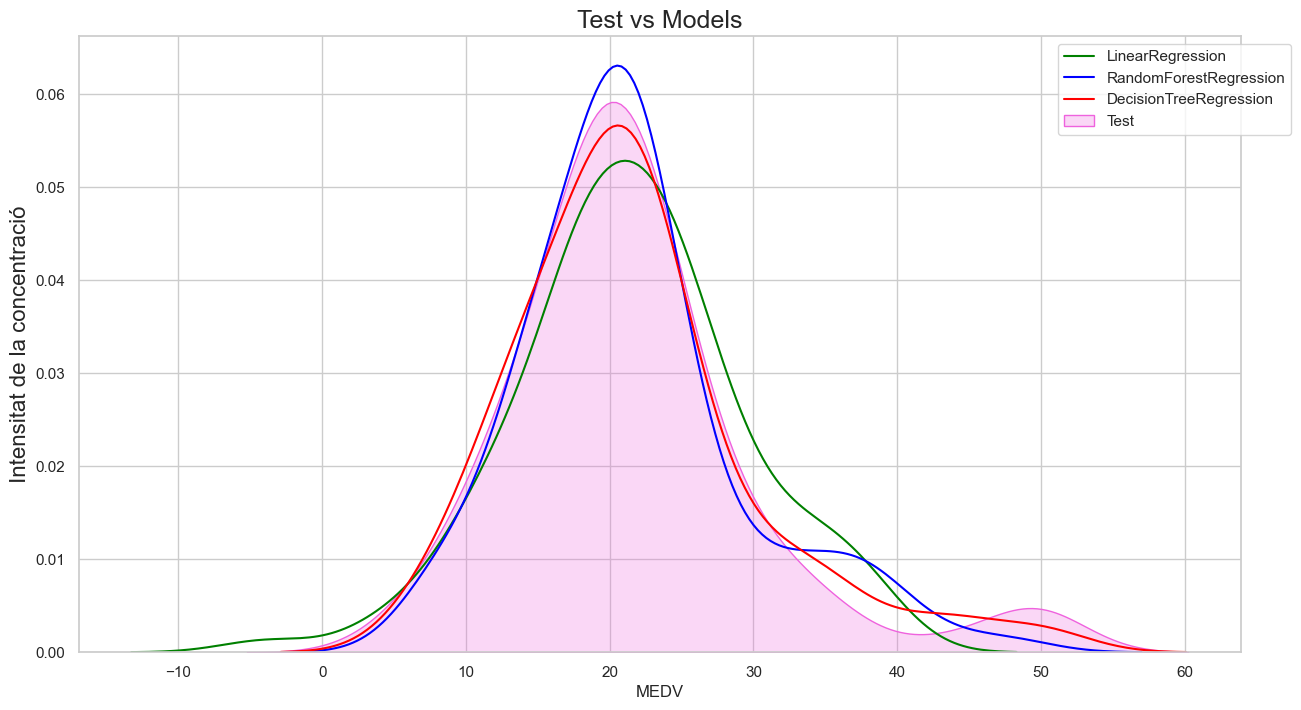

In [159]:
fig, ax = plt.subplots(figsize=(15,8))
sns.set(style= "whitegrid")

sns.kdeplot(y_pre_l_regnoRM , label='LinearRegression', color='green', fill=False)
sns.kdeplot(y_pre_r_fornoRM, label='RandomForestRegression', color='blue', fill=False)
sns.kdeplot(y_pre_d_treenoRM, label='DecisionTreeRegression', color='red', fill=False)
sns.kdeplot(y_test, label='Test', color='#EF62DE', fill=True)
plt.title("Test vs Models", fontsize = 18)
plt.ylabel('Intensitat de la concentració', fontsize = 16)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper right')
plt.show()

In [160]:
# Cargamos la medida R2 para evaluar los modelos de regresión realizados.
r2_l_regnoRM = r2_score(y_test,y_pre_l_regnoRM)
r2_r_fornoRM = r2_score(y_test, y_pre_r_fornoRM)
r2_d_treenoRM = r2_score(y_test, y_pre_d_treenoRM)

In [161]:
# Cargamos la medida MSE para evaluar los modelos de regresión realizados.
mse_l_regnoRM = mean_squared_error(y_test,y_pre_l_regnoRM)
mse_r_fornoRM = mean_squared_error(y_test, y_pre_r_fornoRM)
mse_d_treenoRM = mean_squared_error(y_test, y_pre_d_treenoRM)

In [162]:
# Creamos un DataFrame para poder comparar los resultados de ambas medidas y comparar a su vez con los obtenidos 
# con la variable RM.
resultados = pd.DataFrame( data = [['LinearRegression', r2_l_reg, mse_l_reg, r2_l_regnoRM, mse_l_regnoRM],
                                  ['RandomForestRegression', r2_r_for, mse_r_for,r2_r_fornoRM,mse_r_fornoRM],
                                  ['DecisionTreeRegression', r2_d_tree_reg, mse_d_tree_reg,r2_d_treenoRM,mse_d_treenoRM]],
                                  columns = ['Model', 'R2', 'MSE', 'R2noRM', 'MSEnoRM'])
resultados.head().round(3)


,Model,R2,MSE,R2noRM,MSEnoRM
0,LinearRegression,0.662,24.818,0.687,22.965
1,RandomForestRegression,0.889,8.165,0.799,14.711
2,DecisionTreeRegression,0.715,20.880,0.681,23.360


In [163]:
# Mediante GridSearchCV intentamos mejorar nuestro LinearRegression
l_regnoRM_grid = GridSearchCV(l_regnoRM, l_reg_param)
l_regnoRM_grid_best= l_regnoRM_grid.fit(X_train, y_train)
print("Los mejores parámetros para el LinearRegression son: \n", l_regnoRM_grid.best_params_)

Los mejores parámetros para el LinearRegression son: 
 {'fit_intercept': True, 'n_jobs': -1, 'positive': False}


In [164]:
l_regnoRM_best = LinearRegression(n_jobs=-1).fit(X_train, y_train)
y_pre_l_regnoRM_best = l_regnoRM_best.predict(X_test)
y_pre_l_regnoRM_best[0:10]

array([30.38073759, 35.92681039, 14.34744007, 24.8552756 , 17.68110606,
       23.12917085, 16.86669304, 10.62727179, 23.56715594, 18.473865  ])

In [165]:
mse_l_regnoRM_best = mean_squared_error(y_test, y_pre_l_regnoRM_best)
r2_l_regnoRM_best = r2_score(y_test, y_pre_l_regnoRM_best)

In [166]:
# Mediante GridSearchCV intentamos mejorar nuestro RandomForest (tarda varios minutos).
r_fornoRM_grid = GridSearchCV(r_fornoRM, r_for_param)
r_fornoRM_grid_best= r_fornoRM_grid.fit(X_train, y_train)
print("Los mejores parámetros para el RandomForestRegression son: \n", r_fornoRM_grid_best.best_params_)

Los mejores parámetros para el RandomForestRegression son: 
 {'max_depth': None, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}


In [167]:
r_fornoRM_best = RandomForestRegressor(max_features='log2', n_estimators = 50).fit(X_train, y_train)
y_pre_r_fornoRM_best = r_fornoRM_best.predict(X_test)
y_pre_r_fornoRM_best[0:10]

array([25.768, 33.746, 15.88 , 26.12 , 17.252, 22.776, 19.516, 15.226,
       20.884, 20.996])

In [168]:
mse_r_fornoRM_best = mean_squared_error(y_test, y_pre_r_fornoRM_best)
r2_r_fornoRM_best = r2_score(y_test, y_pre_r_fornoRM_best)

In [169]:
# Mediante GridSearchCV intentamos mejorar nuestro DecisionTree
d_treenoRM_grid = GridSearchCV(d_treenoRM,d_tree_reg_param)
d_treenoRM_grid_best= d_treenoRM_grid.fit(X_train, y_train)
print("Los mejores parámetros para el DecisionTreeRegression son: \n", d_treenoRM_grid_best.best_params_)

Los mejores parámetros para el DecisionTreeRegression son: 
 {'max_depth': 10, 'max_features': 'auto', 'min_samples_leaf': 2, 'min_samples_split': 10}


In [170]:
d_treenoRM_best = DecisionTreeRegressor(max_depth = 10, max_features='auto', min_samples_leaf = 2,min_samples_split = 10 ).fit(X_train, y_train)
y_pre_d_treenoRM_best = d_treenoRM_best.predict(X_test)
y_pre_d_treenoRM_best[0:10]

array([23.652     , 32.83333333, 21.475     , 27.85      , 14.90625   ,
       21.21891892, 15.8       , 15.8       , 20.6       , 21.21891892])

In [171]:
mse_d_treenoRM_best = mean_squared_error(y_test, y_pre_d_treenoRM_best)
r2_d_treenoRM_best = r2_score(y_test, y_pre_d_treenoRM_best)

In [172]:
# Creamos un nuevo DataFrame donde comparar los valores de los modelos antes y despúes de la mejora.
resultados = pd.DataFrame( data = [['LinearRegression', r2_l_reg, mse_l_reg,r2_l_reg_best,mse_l_reg_best,r2_l_regnoRM, mse_l_regnoRM,r2_l_regnoRM_best,mse_l_regnoRM_best],
                                  ['RandomForestRegression', r2_r_for, mse_r_for,r2_r_for_best,mse_r_for_best,r2_r_fornoRM,mse_r_fornoRM,r2_r_fornoRM_best,mse_r_fornoRM_best],
                                  ['DecisionTreeRegression', r2_d_tree_reg, mse_d_tree_reg,r2_d_tree_reg_best,mse_d_tree_reg_best,r2_d_treenoRM,mse_d_treenoRM,r2_d_treenoRM_best,mse_d_treenoRM_best ]],
                                  columns = ['Model', 'R2', 'MSE','R2_best','MSE_best','R2noRM', 'MSEnoRM','R2noRM_best', 'MSEnoRM_best'])
resultados.head().round(3)

,Model,R2,MSE,R2_best,MSE_best,R2noRM,MSEnoRM,R2noRM_best,MSEnoRM_best
0,LinearRegression,0.662,24.818,0.662,24.818,0.687,22.965,0.687,22.965
1,RandomForestRegression,0.889,8.165,0.852,10.864,0.799,14.711,0.764,17.301
2,DecisionTreeRegression,0.715,20.880,0.860,10.264,0.681,23.360,0.628,27.284


In [173]:
#creamos las instancias de cross_val_score para scoring='r2'
cr_l_regnoRM_best_r2 = cross_val_score(l_regnoRM_best, X, y, cv=5, scoring='r2')
cr_r_fornoRM_best_r2 = cross_val_score(r_fornoRM_best, X, y, cv=5, scoring='r2')
cr_d_treenoRM_best_r2 = cross_val_score(d_treenoRM_best, X, y, cv=5, scoring='r2')

In [174]:
# Añadimos las medias de los valores obtenidos a nuestro DataFrame Resultados
resultados['r2_CrValnoRM'] = [cr_l_regnoRM_best_r2.mean(), cr_r_fornoRM_best_r2.mean(), cr_d_treenoRM_best_r2.mean()]
resultados.head().round(3)

,Model,R2,MSE,R2_best,MSE_best,R2noRM,MSEnoRM,R2noRM_best,MSEnoRM_best,r2_CrValnoRM
0,LinearRegression,0.662,24.818,0.662,24.818,0.687,22.965,0.687,22.965,0.476
1,RandomForestRegression,0.889,8.165,0.852,10.864,0.799,14.711,0.764,17.301,0.453
2,DecisionTreeRegression,0.715,20.880,0.860,10.264,0.681,23.360,0.628,27.284,0.336


In [175]:
#creamos las instancias de cross_val_score para scoring='neg_mean_squared_error'
cr_l_regnoRM_best_mse = cross_val_score(l_regnoRM_best, X, y, cv=5, scoring='neg_mean_squared_error')
cr_r_fornoRM_best_mse = cross_val_score(r_fornoRM_best, X, y, cv=5, scoring='neg_mean_squared_error')
cr_d_treenoRM_best_mse = cross_val_score(d_treenoRM_best, X, y, cv=5, scoring='neg_mean_squared_error')

In [176]:
# Añadimos las medias de los valores obtenidos a nuestro DataFrame Resultados
resultados['mse_CrValnoRM'] = [cr_l_regnoRM_best_mse.mean(), cr_r_fornoRM_best_mse.mean(), cr_d_treenoRM_best_mse.mean()]
resultados.head().round(3)

,Model,R2,MSE,R2_best,MSE_best,R2noRM,MSEnoRM,R2noRM_best,MSEnoRM_best,r2_CrValnoRM,mse_CrValnoRM
0,LinearRegression,0.662,24.818,0.662,24.818,0.687,22.965,0.687,22.965,0.476,-31.232
1,RandomForestRegression,0.889,8.165,0.852,10.864,0.799,14.711,0.764,17.301,0.453,-31.706
2,DecisionTreeRegression,0.715,20.880,0.860,10.264,0.681,23.360,0.628,27.284,0.336,-36.328


<div class="alert alert-info alert-info">
    
Con los valores obtenidos, podemos decir que en ausencia de la variable **RM** el modelo de mejor comportamiento sigue siendo el RandomForest, seguido del DecisionTree, aunque sus indices son peores en ausencia de la variable. El modelo LinearRegression mejora muy levemente si no la utilizamos. Aplicando las mejoras, todos empeoran sus indices excepto el LinearRegressión que mantiene sus valores. Este empeoramiento puede ser debido a que los datos para el entrenamiento son insuficientes (404 registros) o que ha habido Overfitting.
</div>